# SCM - CAR SALES PREDICTION 

In [2]:
#IMPORTING STEUP
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [3]:
#Importing csv file
data = pd.read_csv('Car_SupplyChainManagementDataSet.csv')
data.head()

,SupplierID,SupplierAddress,SupplierName,SupplierContactDetails,ProductID,CarMaker,CarModel,CarColor,CarModelYear,CarPrice,...,ShipDate,ShipMode,Shipping,PostalCode,Sales,Quantity,Discount,CreditCardType,CreditCard,CustomerFeedback
0,1,542 Dayton Center,Bubbletube,871-57-6028,8893,Dodge,Ram 2500,Goldenrod,2007,521963.45,...,14/03/2019,Standard Class,Truck,99522,744796.41,1,0.83,diners-club-carte-blanche,3.040800e+13,Bad
1,2,0674 Springview Circle,Tagopia,337-64-4060,9444,Toyota,Tundra,Crimson,2010,672222.04,...,06/03/2019,Standard Class,Truck,56398,794773.17,1,0.79,jcb,3.549220e+15,Good
2,3,70 Autumn Leaf Center,Zoomdog,218-19-1802,253,GMC,Savana 1500,Crimson,2011,504465.72,...,20/01/2019,Second Class,Air,60674,968244.90,1,0.28,jcb,3.557160e+15,Okay
3,4,649 Corben Lane,Oozz,635-15-3112,1283,Volkswagen,Cabriolet,Fuscia,1990,646077.11,...,16/03/2019,First Class,Truck,32885,942213.82,2,0.76,jcb,3.529910e+15,Very Bad
4,5,94 Namekagon Point,Kare,849-23-6788,8905,Mercury,Mariner,Teal,2009,699890.24,...,29/01/2019,Second Class,Air,48232,879519.57,1,0.50,china-unionpay,5.602240e+15,Bad


In [4]:
#Checking Shape of Data
data.shape

(1000, 33)

In [5]:
#Learning about data
data.describe(include = 'all')

,SupplierID,SupplierAddress,SupplierName,SupplierContactDetails,ProductID,CarMaker,CarModel,CarColor,CarModelYear,CarPrice,...,ShipDate,ShipMode,Shipping,PostalCode,Sales,Quantity,Discount,CreditCardType,CreditCard,CustomerFeedback
count,1000.000000,1000,1000,1000,1000.00000,1000,1000,1000,1000.000000,1000.000000,...,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1.000000e+03,1000
unique,NaN,1000,362,1000,NaN,54,504,19,NaN,NaN,...,168,4,2,NaN,NaN,NaN,NaN,16,NaN,5
top,NaN,32 Scott Place,Kazu,803-42-2537,NaN,Chevrolet,Century,Yellow,NaN,NaN,...,23/01/2019,Second Class,Air,NaN,NaN,NaN,NaN,jcb,NaN,Bad
freq,NaN,1,8,1,NaN,83,9,63,NaN,NaN,...,14,254,509,NaN,NaN,NaN,NaN,425,NaN,211
mean,500.500000,NaN,NaN,NaN,5376.06400,NaN,NaN,NaN,2000.281000,649092.193460,...,NaN,NaN,NaN,53290.941000,853098.713020,1.512000,0.577360,NaN,3.685437e+17,NaN
std,288.819436,NaN,NaN,NaN,3217.91006,NaN,NaN,NaN,9.149741,85427.262753,...,NaN,NaN,NaN,29697.445428,88538.571965,0.500106,0.187478,NaN,1.372155e+18,NaN
min,1.000000,NaN,NaN,NaN,3.00000,NaN,NaN,NaN,1953.000000,500412.460000,...,NaN,NaN,NaN,214.000000,700321.490000,1.000000,0.250000,NaN,4.017950e+12,NaN
25%,250.750000,NaN,NaN,NaN,2619.50000,NaN,NaN,NaN,1994.000000,572393.805000,...,NaN,NaN,NaN,28706.250000,775655.062500,1.000000,0.410000,NaN,3.538998e+15,NaN
50%,500.500000,NaN,NaN,NaN,5544.00000,NaN,NaN,NaN,2002.000000,654965.000000,...,NaN,NaN,NaN,50330.000000,858117.980000,2.000000,0.580000,NaN,3.576750e+15,NaN
75%,750.250000,NaN,NaN,NaN,8380.25000,NaN,NaN,NaN,2008.000000,721050.725000,...,NaN,NaN,NaN,80126.250000,932854.565000,2.000000,0.740000,NaN,5.491648e+15,NaN


In [7]:
#Checking null values in data, if any, and data type of Columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
SupplierID                1000 non-null int64
SupplierAddress           1000 non-null object
SupplierName              1000 non-null object
SupplierContactDetails    1000 non-null object
ProductID                 1000 non-null int64
CarMaker                  1000 non-null object
CarModel                  1000 non-null object
CarColor                  1000 non-null object
CarModelYear              1000 non-null int64
CarPrice                  1000 non-null float64
CustomerID                1000 non-null object
CustomerName              1000 non-null object
Gender                    1000 non-null object
JobTitle                  1000 non-null object
PhoneNumber               1000 non-null object
EmailAddress              1000 non-null object
City                      1000 non-null object
Country                   1000 non-null object
CountryCode               1000 non-null object
Sta

# Plotting Boxplot graphs

In [8]:
#Importing seaborn and matplotlib.pyplot libraries
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Boxplot between Car Maker and Sales

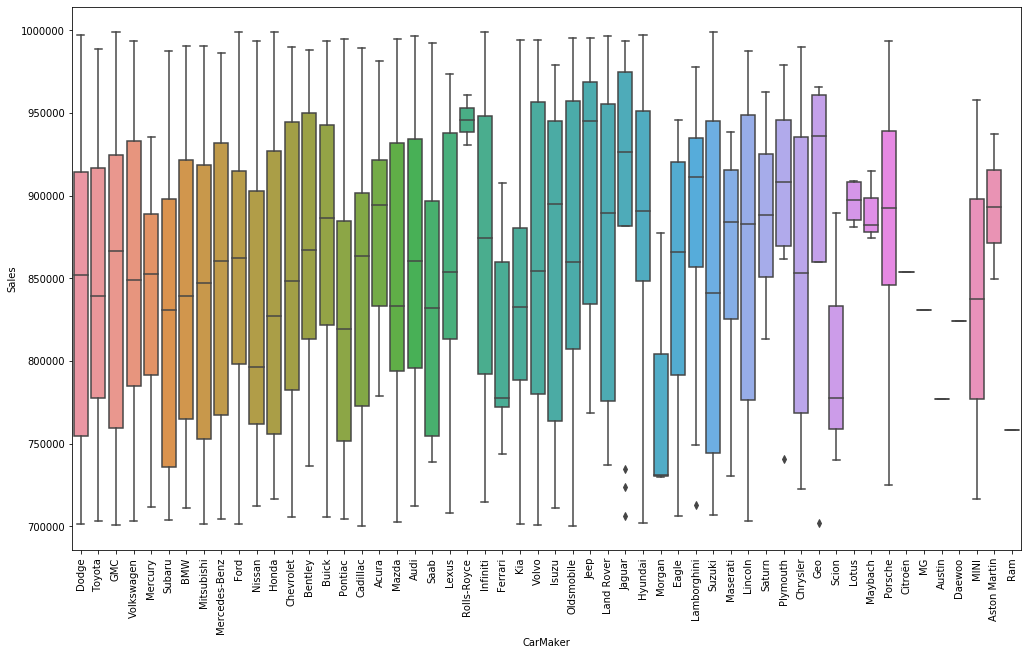

In [10]:
plt.subplots(figsize = (17,10))
plt.xticks(rotation=90)
sns.boxplot(x="CarMaker", y="Sales", data=data)

# 2. Boxplot between Car Color and Sales

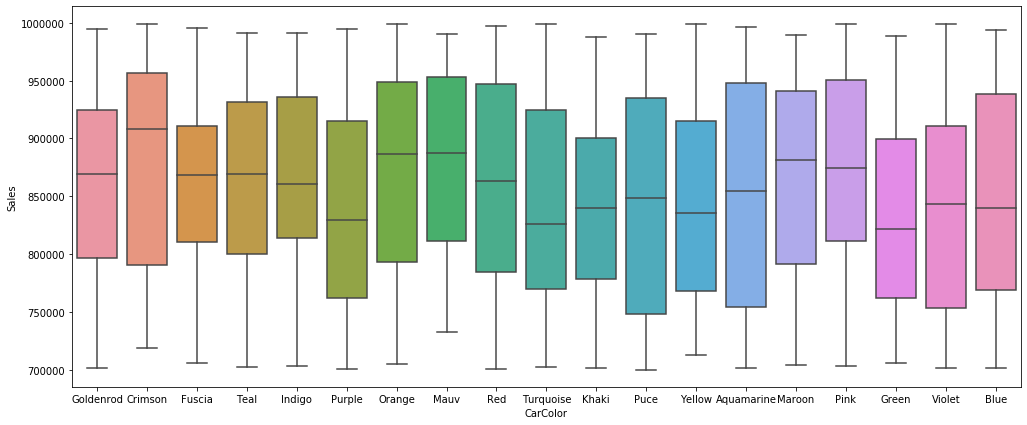

In [11]:
plt.subplots(figsize = (17,7))

sns.boxplot(x="CarColor", y="Sales", data=data)

# 3. Boxplot for State wise Sales

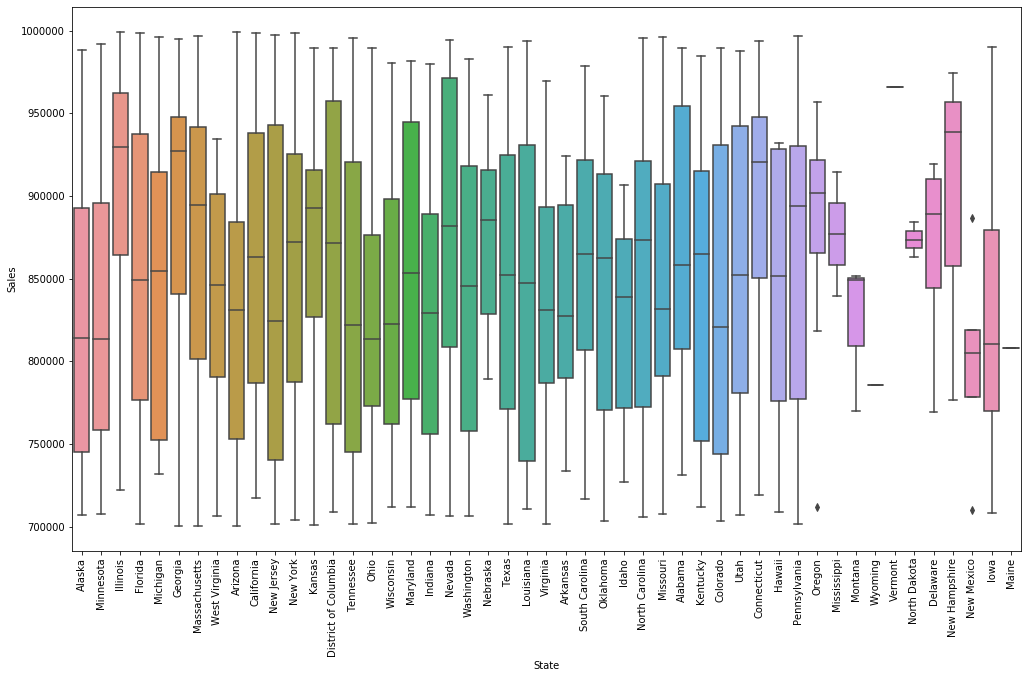

In [12]:
plt.subplots(figsize = (17,10))
plt.xticks(rotation=90)
sns.boxplot(x="State", y="Sales", data=data)

# 4. Boxplot between Ship Mode and Sales

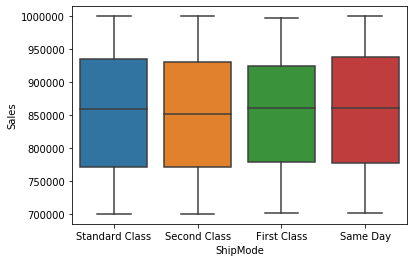

In [13]:
sns.boxplot(x="ShipMode", y="Sales", data=data)

# 5. Boxplot for Shipping and Sales

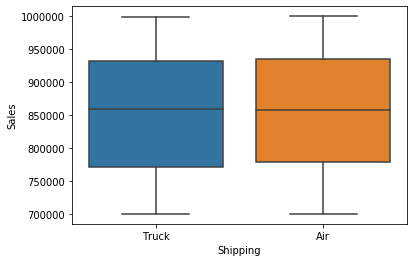

In [14]:
sns.boxplot(x="Shipping", y="Sales", data=data)

# 6. Boxplot between Credit Card Type and Sales

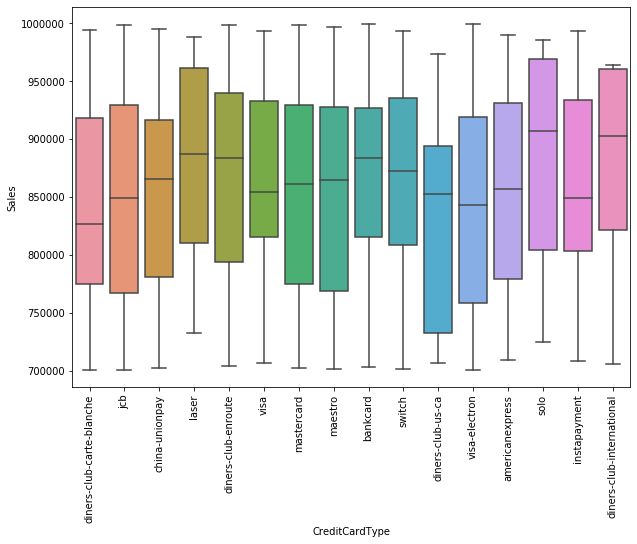

In [15]:
plt.subplots(figsize = (10,7))
plt.xticks(rotation = 90)
sns.boxplot(x="CreditCardType", y="Sales", data=data)

# 7. Boxplot for Customer Feedback and Sales

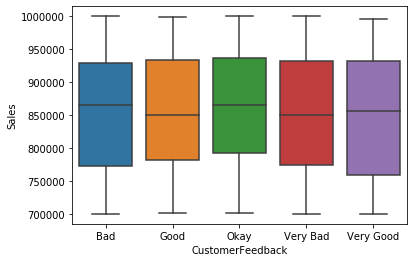

In [16]:
sns.boxplot(x="CustomerFeedback", y="Sales", data=data)

# 8. Boxplot between Gender and Sales

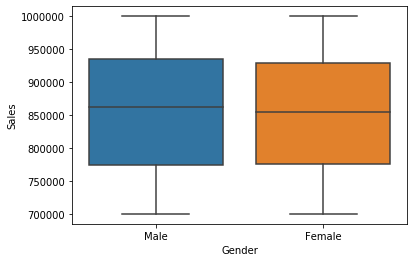

In [17]:
sns.boxplot(x="Gender", y="Sales", data=data)

# Aggregating all the numerical columns

In [18]:
#Using describe fuction to aggregate numerical coulumns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SupplierID,1000.0,5.005000e+02,2.888194e+02,1.000000e+00,2.507500e+02,5.005000e+02,7.502500e+02,1.000000e+03
ProductID,1000.0,5.376064e+03,3.217910e+03,3.000000e+00,2.619500e+03,5.544000e+03,8.380250e+03,9.991000e+03
CarModelYear,1000.0,2.000281e+03,9.149741e+00,1.953000e+03,1.994000e+03,2.002000e+03,2.008000e+03,2.013000e+03
CarPrice,1000.0,6.490922e+05,8.542726e+04,5.004125e+05,5.723938e+05,6.549650e+05,7.210507e+05,7.994542e+05
PostalCode,1000.0,5.329094e+04,2.969745e+04,2.140000e+02,2.870625e+04,5.033000e+04,8.012625e+04,9.981200e+04
Sales,1000.0,8.530987e+05,8.853857e+04,7.003215e+05,7.756551e+05,8.581180e+05,9.328546e+05,9.993157e+05
Quantity,1000.0,1.512000e+00,5.001061e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
Discount,1000.0,5.773600e-01,1.874779e-01,2.500000e-01,4.100000e-01,5.800000e-01,7.400000e-01,9.000000e-01
CreditCard,1000.0,3.685437e+17,1.372155e+18,4.017950e+12,3.538998e+15,3.576750e+15,5.491648e+15,6.771540e+18


# Checking Data

In [19]:
#Checking unique values of columns
data.nunique()

SupplierID                1000
SupplierAddress           1000
SupplierName               362
SupplierContactDetails    1000
ProductID                  883
CarMaker                    54
CarModel                   504
CarColor                    19
CarModelYear                47
CarPrice                  1000
CustomerID                 994
CustomerName              1000
Gender                       2
JobTitle                   182
PhoneNumber               1000
EmailAddress              1000
City                       300
Country                      1
CountryCode                  1
State                       49
CustomerAddress           1000
OrderDate                  337
OrderID                    993
ShipDate                   168
ShipMode                     4
Shipping                     2
PostalCode                 777
Sales                     1000
Quantity                     2
Discount                    66
CreditCardType              16
CreditCard                 836
Customer

In [20]:
#Note: There is only single country and country code in our data

In [21]:
#Checking for duplicate values if any
data[data.duplicated() == True]

,SupplierID,SupplierAddress,SupplierName,SupplierContactDetails,ProductID,CarMaker,CarModel,CarColor,CarModelYear,CarPrice,...,ShipDate,ShipMode,Shipping,PostalCode,Sales,Quantity,Discount,CreditCardType,CreditCard,CustomerFeedback


In [22]:
#No duplicate rows found

# Checking Correlation using Heatmap Chart

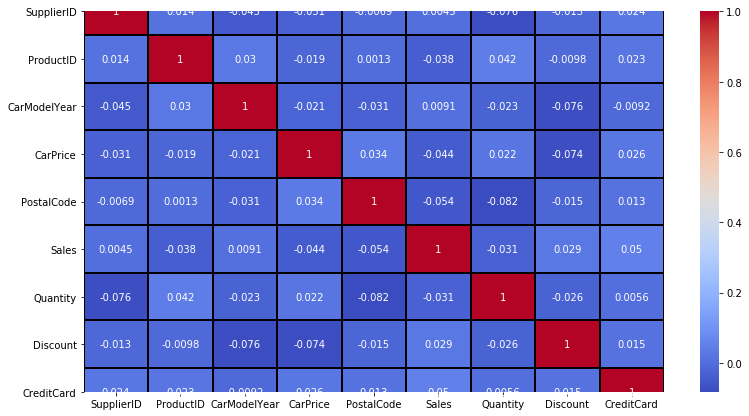

In [23]:
plt.subplots(figsize = (13,7))
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm', linewidths = 1, linecolor = 'black') 

# Regression Plots

# 1. Regression plot between Car price and Sales

(0, 1015689.585213513)

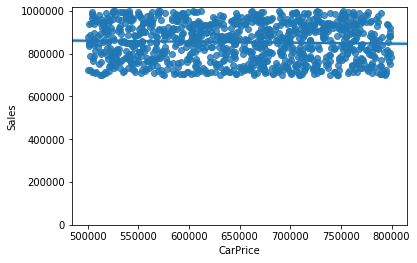

In [24]:
sns.regplot(x="CarPrice", y="Sales", data=data)
plt.ylim(0,)

# 2. Regression plot between Car Model Year and Sales

(0, 1015689.585213513)

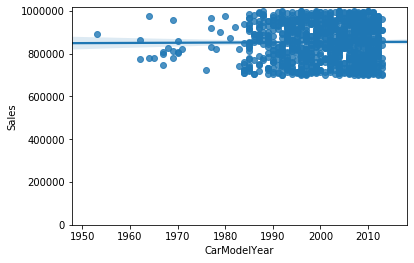

In [25]:
sns.regplot(x="CarModelYear", y="Sales", data=data)
plt.ylim(0,)

# 3. Regression plot between Discount and Sales

(0, 1015689.585213513)

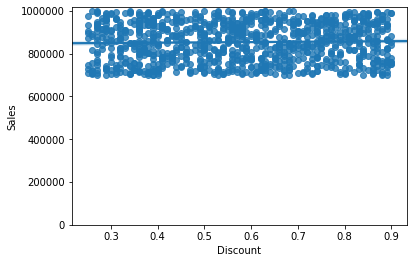

In [26]:
sns.regplot(x="Discount", y="Sales", data=data)
plt.ylim(0,)

# Bar Graphs

# 1. Plotting Bar Graph between Car Maker and Sales

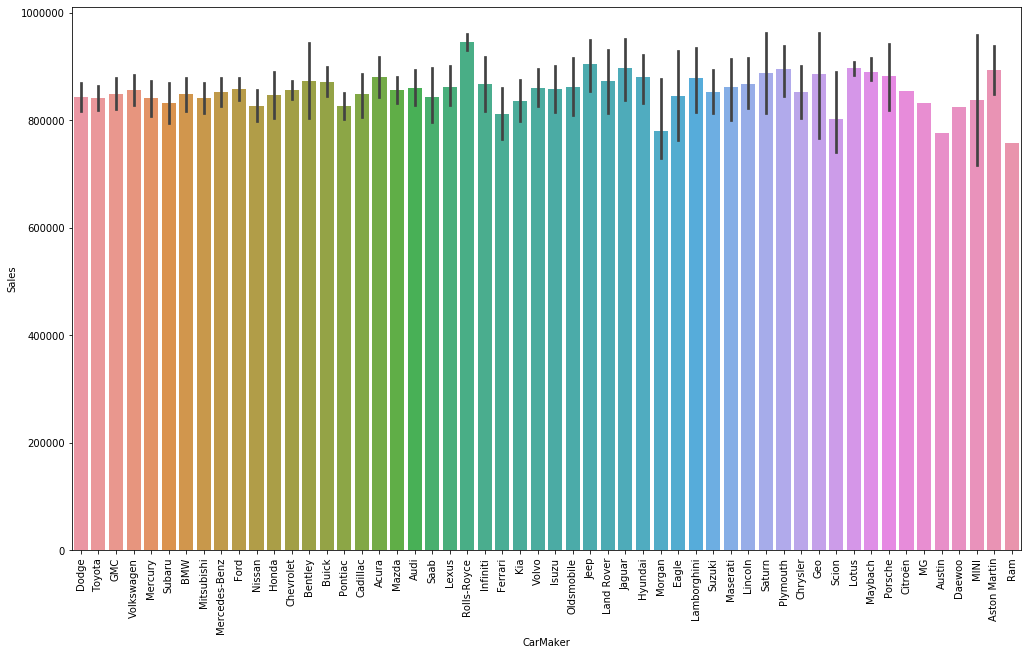

In [28]:
plt.subplots(figsize = (17,10))
plt.xticks(rotation=90)
sns.barplot(x="CarMaker", y="Sales", data=data)


# 2. Plotting Bar Graph between Car Color and Sales

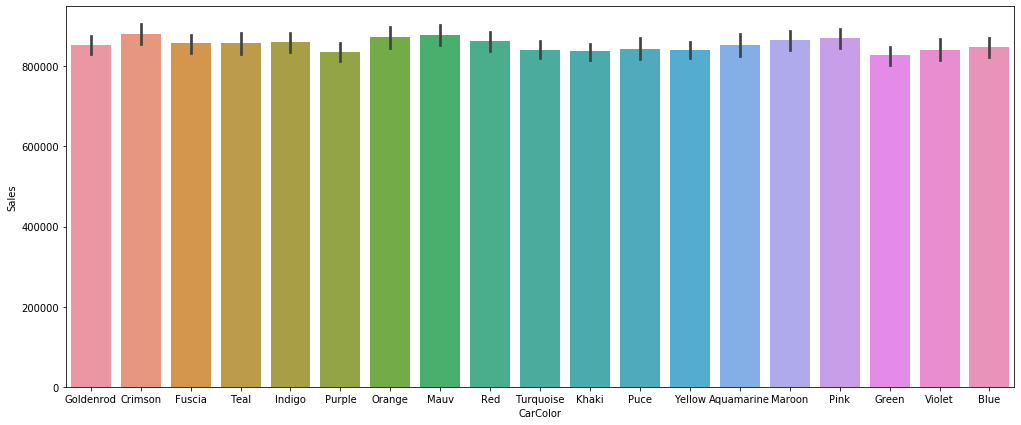

In [29]:
plt.subplots(figsize = (17,7))

sns.barplot(x="CarColor", y="Sales", data=data)

# 3. Plotting Bar Graph for State wise Sales

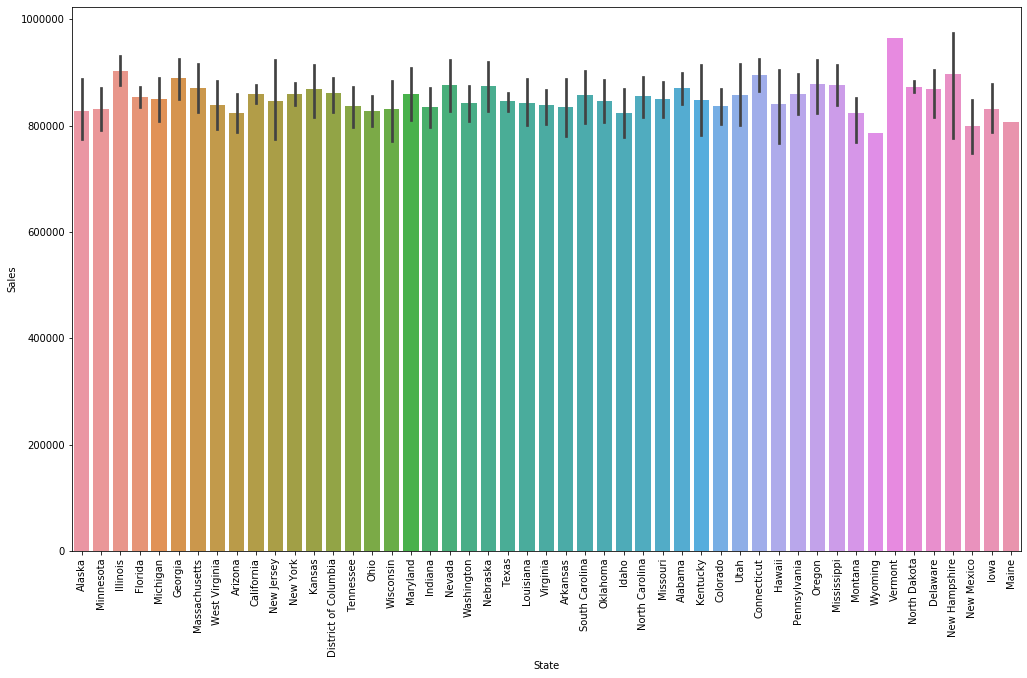

In [30]:
plt.subplots(figsize = (17,10))
plt.xticks(rotation=90)
sns.barplot(x="State", y="Sales", data=data)

# 4. Plotting Bar Graph between Ship Mode and Sales

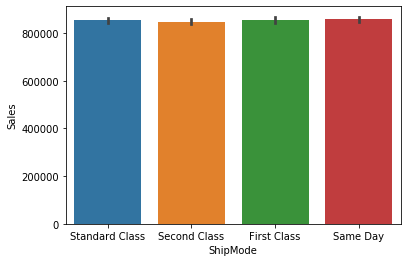

In [31]:
sns.barplot(x="ShipMode", y="Sales", data=data)

# 5. Plotting Bar Graph between Shipping and Sales

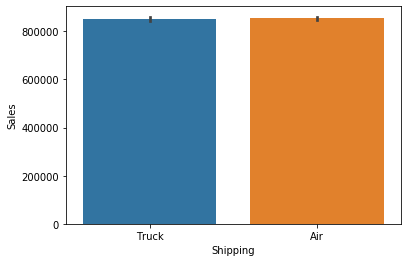

In [32]:
sns.barplot(x="Shipping", y="Sales", data=data)

# 6. Plotting Bar Graph between Credit Card Type and Sales

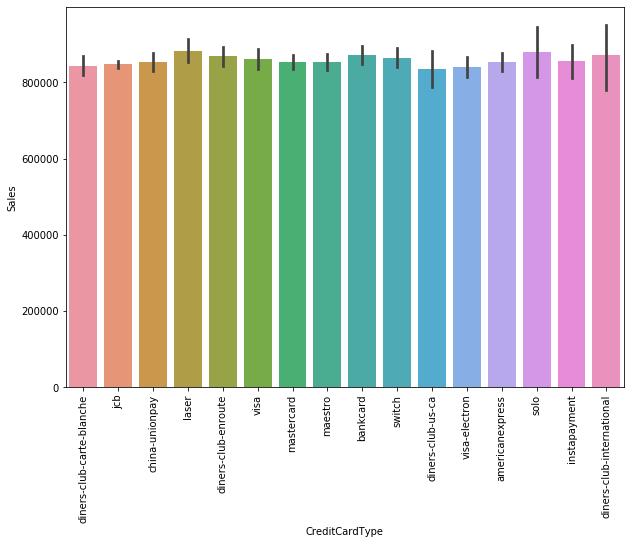

In [33]:
plt.subplots(figsize = (10,7))
plt.xticks(rotation = 90)
sns.barplot(x="CreditCardType", y="Sales", data=data)

# 7. Plotting Bar Graph between Customer Feedback and Sales 

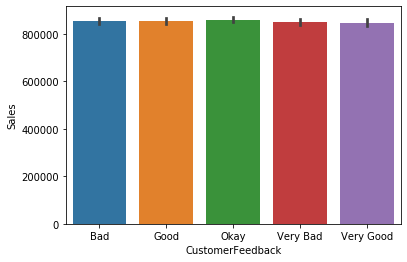

In [34]:
sns.barplot(x="CustomerFeedback", y="Sales", data=data)

# 8. Plotting Bar Graph between Gender and Sales

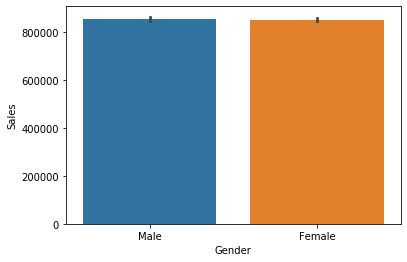

In [35]:
sns.barplot(x="Gender", y="Sales", data=data)

# PAIR PLOT 

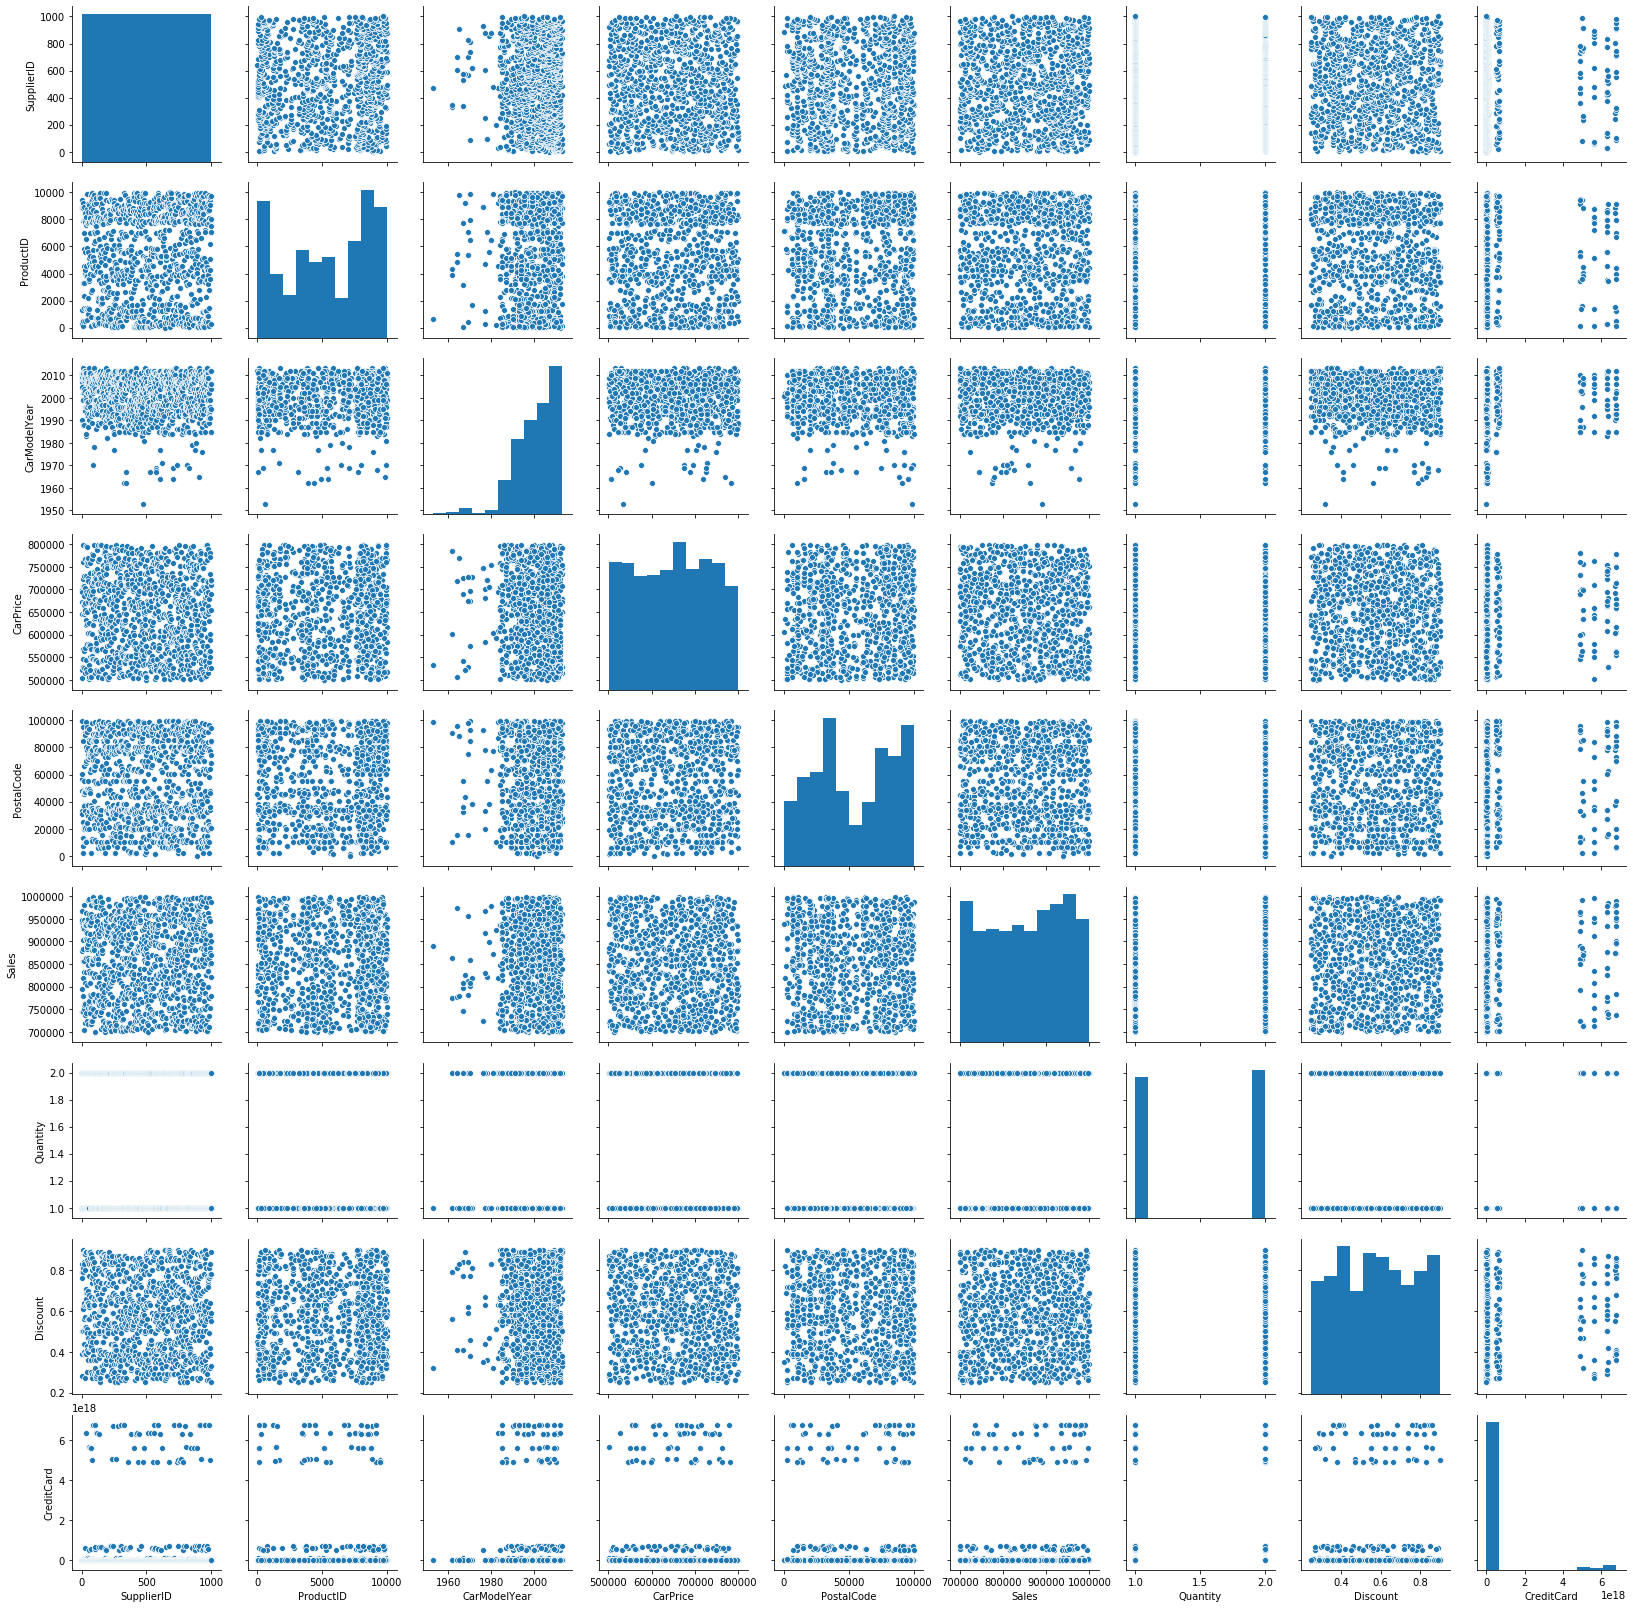

In [36]:
sns.pairplot(data)

# DATA CLEANING

In [37]:
#Since no duplicate rows in data 
#dropping all the non essential features 
df = data.drop(["SupplierID", "CreditCard", "ShipDate", "PostalCode", "OrderID", "OrderDate", "CustomerAddress", "CountryCode" ,"EmailAddress", "PhoneNumber", "CustomerName", "CustomerID", "CarModel" ,"ProductID", "SupplierContactDetails", "SupplierAddress" ,"SupplierName","City",'State'], axis=1)

In [38]:
df.shape

(1000, 14)

In [85]:
df.head()

,CarMaker,CarColor,CarModelYear,CarPrice,Gender,JobTitle,Country,ShipMode,Shipping,Sales,Quantity,Discount,CreditCardType,CustomerFeedback
0,12,4,2007,521963.45,1,94,0,3,1,744796.41,1,0.83,3,0
1,51,2,2010,672222.04,1,162,0,3,1,794773.17,1,0.79,8,1
2,16,2,2011,504465.72,1,165,0,2,0,968244.90,1,0.28,8,2
3,52,3,1990,646077.11,1,106,0,0,1,942213.82,2,0.76,8,3
4,36,15,2009,699890.24,0,147,0,2,0,879519.57,1,0.50,2,0


In [40]:
#Checking for unique values again
df.nunique()

CarMaker              54
CarColor              19
CarModelYear          47
CarPrice            1000
Gender                 2
JobTitle             182
Country                1
ShipMode               4
Shipping               2
Sales               1000
Quantity               2
Discount              66
CreditCardType        16
CustomerFeedback       5
dtype: int64

# Using Z-Score Checking Outliers

In [44]:
#as data is not big and we dont have such ouliers lets use Z score to check outliers
#Z-score to check outliers in data
from scipy import stats
z = np.abs(stats.zscore(df[['CarModelYear','Quantity','Discount','Sales']]))
print(np.where(z>3))

(array([ 87, 329, 337, 342, 471, 526, 569, 572, 576, 606, 619, 700, 702,
       736, 810, 824, 904], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


# ENCODING DATA

In [46]:
#using label encoder to encode all the coulums with data type as object

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in df.columns.values:

       if df[col].dtypes=='object':
            data1=df[col].append(df[col])
            le.fit(data1.values)
            df[col]=le.transform(df[col])

In [86]:
df.head()

,CarMaker,CarColor,CarModelYear,CarPrice,Gender,JobTitle,Country,ShipMode,Shipping,Sales,Quantity,Discount,CreditCardType,CustomerFeedback
0,12,4,2007,521963.45,1,94,0,3,1,744796.41,1,0.83,3,0
1,51,2,2010,672222.04,1,162,0,3,1,794773.17,1,0.79,8,1
2,16,2,2011,504465.72,1,165,0,2,0,968244.90,1,0.28,8,2
3,52,3,1990,646077.11,1,106,0,0,1,942213.82,2,0.76,8,3
4,36,15,2009,699890.24,0,147,0,2,0,879519.57,1,0.50,2,0


# Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

X= df.loc[:,df.columns != 'Sales']
y= df.loc[:,df.columns == 'Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.25,random_state=0)

# RANDOM FOREST REGRESSOR

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
rfr=RandomForestRegressor(random_state=42)

In [115]:
rfr.fit(X_test, y_test)

RandomForestRegressor(random_state=42)

# Score

In [55]:
s_rfr =rfr.score(X_test, y_test)
print('RF=',s_rfr)

RF= 0.8493982360214787


# HYPERPARAMETER TUNING

# Randomized Search

In [58]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 4)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 80, num = 8)]
max_depth.append(None)



# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}
             #  'min_samples_split': min_samples_split,
              # 'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, None]}


In [60]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800]},
                   random_state=42, verbose=2)

# Checking best parameters of randomized search

In [61]:
#Lets see best parameters
rf_random.best_params_

{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 60}

# Evaluating random search

In [74]:
rfr=RandomForestRegressor(n_estimators = 200,max_features = 'sqrt' ,max_depth = 42,random_state=42)

In [75]:
rfr.fit(X_test, y_test)

RandomForestRegressor(max_depth=42, max_features='sqrt', n_estimators=200,
                      random_state=42)

# Score for random search

In [76]:
s_rfr1 =rfr.score(X_test, y_test)
print('RF=',s_rfr1)

RF= 0.8501772978781046


# GRID SEARCH

In [78]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,20,30,40],
    'max_features': ['sqrt'],
    'n_estimators': [100, 200, 300, 400]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)


In [79]:
# Fit the grid search to the data
grid_search.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   16.1s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt'],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

# Checking best parameters of Grid search

In [80]:
grid_search.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}

# Fitting Grid Search parameters

In [82]:
rf=RandomForestRegressor(n_estimators = 200,max_features = 'sqrt' ,max_depth = 20,random_state=42)

In [83]:
rf.fit(X_test, y_test)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                      random_state=42)

# Score for Grid Search

In [84]:
s_rfr2 =rf.score(X_test, y_test)
print('RF=',s_rfr2)

RF= 0.8505915133324128


In [93]:
print('So final score of Simple Random forest regressor is = ',round(s_rfr*100,2),'% and after random search best score is = ',round(s_rfr1*100,2),'% and after Grid search score is = ',round(s_rfr2*100,2),'%')

So final score of Simple Random forest regressor is =  84.94 % and after random search best score is =  85.02 % and after Grid search score is =  85.06 %


#Accuracy of Random forest after grid search in hyperparameter tuning is best

In [94]:
#defining y predicted
ypred = rf.predict(X_test)
ypred

array([899646.1434    , 951222.81305   , 885414.7419    , 853607.18516   ,
       936968.038     , 917422.64855   , 908346.45241   , 899617.45785   ,
       903045.8069    , 844050.14215   , 918521.49045   , 952343.11505   ,
       909294.31155   , 897215.34366667, 864127.40535   , 841519.57105   ,
       860342.092     , 905298.9872    , 842829.915     , 885295.308175  ,
       889912.183     , 923820.9652    , 916973.127     , 853305.7779    ,
       759671.1965    , 834175.57685   , 856222.92725833, 942653.25045   ,
       877068.37026667, 840417.22985   , 818205.90925   , 843801.066975  ,
       820583.4833    , 949800.4917    , 762256.23755   , 801695.46095   ,
       946259.4697    , 924750.38915   , 777451.64095   , 784956.48475   ,
       853565.43495   , 943275.69315   , 914779.01426667, 857820.5646    ,
       760072.27485   , 874635.919575  , 828095.94215   , 780004.4848    ,
       779201.95715   , 833260.31191   , 869719.547     , 910336.826     ,
       909153.9583    , 9

# MAE, MSE, RMSE and R-Squared value of Model

In [100]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, ypred)
mse = metrics.mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,ypred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 28937.11115508668
MSE: 1157510752.6808736
RMSE: 34022.20969720917
R-Squared: 0.8505915133324128


# Building SVM 

In [105]:
from sklearn.svm import SVR

In [108]:
#Building model
svm = SVR()
svm.fit(X_train,y_train)

SVR()

In [110]:
#checking predicted values
y_pred = svm.predict(X_test)
y_pred

array([854461.52716123, 854463.31638525, 854461.71604582, 854461.30484049,
       854463.11160681, 854463.47276116, 854462.33508803, 854463.48328854,
       854463.1688569 , 854462.90290079, 854463.53545801, 854461.26624341,
       854461.75619185, 854461.38767238, 854461.26862061, 854463.57949657,
       854462.8563851 , 854461.38012712, 854462.13528182, 854461.22599534,
       854460.96319166, 854462.87514341, 854463.50270186, 854461.03691645,
       854461.41450435, 854461.19479641, 854462.74885926, 854462.17728198,
       854463.28963974, 854462.1170735 , 854461.14143957, 854462.86061685,
       854461.37238261, 854461.83242455, 854461.3086112 , 854462.09366004,
       854461.9588229 , 854462.88805177, 854461.10159593, 854461.99462161,
       854463.43774097, 854461.95107117, 854463.36913311, 854463.47904014,
       854461.00625787, 854463.17733459, 854463.49410102, 854462.72006812,
       854463.533899  , 854463.07218527, 854462.53278535, 854461.54374869,
       854462.20841693, 8

In [116]:
#Checking score of SVM
s_rfr3 =svm.score(X_test, y_test)
print('SVM=',s_rfr3)

SVM= -0.0032080233056863694


#SVM failed for this dataset

# Building Linear Regression Model

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
#Building Model
LinearRegressionModelObject1 = LinearRegression()

In [121]:
#Fitting Model
LinearRegressionModelObject1.fit(X_train, y_train)

LinearRegression()

In [122]:
#Checking score of model
s_lr =LinearRegressionModelObject1.score(X_test, y_test)
print('LR=',s_lr)

LR= -0.022349774457180116


#Linear regression model also failed

# Building Decision Tree Regressor Model

In [125]:
#Importing Decision tree
from sklearn.tree import DecisionTreeRegressor

In [126]:
#Building Model
tree = DecisionTreeRegressor()

In [127]:
#Fitting Model
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [128]:
#Checking score of model
s_dt =tree.score(X_test, y_test)
print('DT=',s_dt)

DT= -1.2472956750676123


#Decision Tree also failed for this dataset

# Conclusion
The best model amongst all is Random Forest regressor model after hyperparameter tuning.

Submitted by: Shreyank Purohit 


LinkedIn id: [shreyankpurohit13](https://www.linkedin.com/in/shreyankpurohit13/)

Github id: [Shreyank1397](https://github.com/Shreyank1397)